In [27]:
import os
import sys
import numpy as np
import pdb
import matplotlib.pyplot as plt


In [43]:
def plot_train_and_val(logfile):
    
    mse_weight = 0.000001
    sum_weight = 10
    var_weight = 1000
    train_set_ALL=[]
    train_set_MSE=[]
    train_set_SUM=[]
    train_set_VAR=[]
    test_set_ALL=[]
    test_set_MSE=[]
    test_set_SUM=[]
    test_set_VAR=[]

    with open(logfile, "r+") as f:
        for line in f:
            if "Mean Train Loss" in line:
                train=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                train_set_ALL.append(train)
            if "MSE_train" in line:
                train=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                train_set_MSE.append(train)
            if "Sum_loss_train" in line:
                train=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                train_set_SUM.append(train)
            if "Var_loss_train" in line:
                train=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                train_set_VAR.append(train)
            if "Mean Validation Loss" in line:
                test=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                test_set_ALL.append(test)
            if "MSE_val" in line:
                test=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                test_set_MSE.append(test)
            if "Sum_loss_val" in line:
                test=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                test_set_SUM.append(test)
            if "Var_loss_val" in line:
                test=float(line.split(':')[-1].rstrip('\n').rstrip(' '))
                test_set_VAR.append(test)

    npALL=np.array(train_set_ALL)
    npSUM=np.array(train_set_SUM)*sum_weight
    npMSE=np.array(train_set_MSE)*mse_weight
    npVAR=np.array(train_set_VAR)*var_weight
    
    npALL_val=np.array(test_set_ALL)
    npSUM_val=np.array(test_set_SUM)*sum_weight
    npMSE_val=np.array(test_set_MSE)*mse_weight
    npVAR_val=np.array(test_set_VAR)*var_weight

    plt.figure(figsize=(16,8))
    plt.subplot(131)
    plt.title('Loss')
    plt.plot(np.arange(len(npALL)),npALL)    
    plt.plot(np.arange(len(npALL_val)),npALL_val)
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.legend(['train_3loss', 'val_3loss'])
    plt.subplot(132)
    plt.title('Train')
    plt.plot(np.arange(len(npALL)),npMSE)
    plt.plot(np.arange(len(npALL)),npSUM)
    plt.plot(np.arange(len(npALL)),npVAR)
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.legend(['MSE','Sum_loss','Var_loss'])
    plt.subplot(133)
    plt.title('Validation')
    plt.plot(np.arange(len(npALL_val)),npMSE_val)
    plt.plot(np.arange(len(npALL_val)),npSUM_val)
    plt.plot(np.arange(len(npALL_val)),npVAR_val)
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.legend(['MSE','Sum_loss','Var_loss'])
    plt.show()

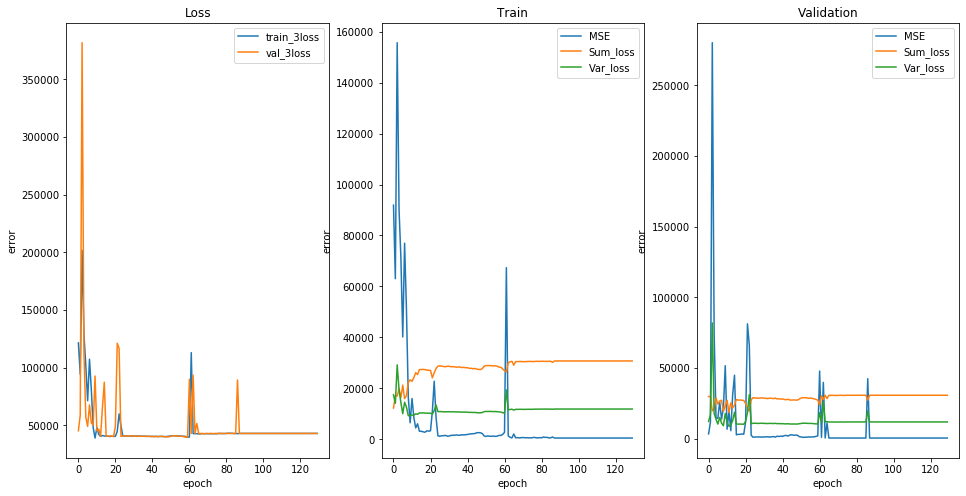

In [47]:
logfiles = ['/home/nuong/Desktop/working_dir/experiment_dir/20190729-111415_reweighted_RUN_3Loss_bsz11_TempSpace_stack_Selector']
#

for logfile in logfiles:
    plot_train_and_val(os.path.join(logfile,'log/logfile.txt'))

In [39]:
npALL

npMSE

npSUM

npVAR



array([ 48.26103387,  42.40950466,  56.23118031, ..., 517.97933893,
       493.87830895, 493.87830892])